In [30]:
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

In [31]:
results = pl.read_parquet("validation-data-linear-svc-results.parquet")

In [32]:
results = results.with_columns(
    pl.col("Features").map_elements(lambda x: len(x)).alias("Feature_Count")
)

# Filter rows where the length is equal to 1
single_features_df = results.filter(pl.col("Feature_Count") == 1)
single_features_df

Features,NumFeatures,TrainTime,PredictTime,Accuracy,ConfusionMatrix_Shape,ConfusionMatrix,ClassificationReport,ModelPath,Feature_Count
list[str],i64,f64,f64,f64,list[i64],list[i64],str,str,i64
"[""hue""]",180,0.320508,0.501686,0.327796,"[43, 43]","[21, 5, … 16]",""" …","""models\linear-…",1
"[""sat""]",256,0.396861,0.70666,0.29845,"[43, 43]","[32, 2, … 26]",""" …","""models\linear-…",1
"[""value""]",256,0.398863,0.911218,0.162237,"[43, 43]","[22, 2, … 22]",""" …","""models\linear-…",1
"[""hog""]",2916,2.446871,2.685523,0.975637,"[43, 43]","[48, 0, … 41]",""" …","""models\linear-…",1
"[""lbp""]",4096,3.735731,9.230073,0.904208,"[43, 43]","[48, 0, … 41]",""" …","""models\linear-…",1
"[""template""]",3483,3.002549,1.947411,0.909192,"[43, 43]","[47, 1, … 41]",""" …","""models\linear-…",1
"[""vgg16""]",512,0.596107,1.619226,0.019934,"[43, 43]","[0, 0, … 0]",""" …","""models\linear-…",1
"[""resnet101""]",2048,1.862437,2.812711,0.727021,"[43, 43]","[47, 0, … 36]",""" …","""models\linear-…",1


<Figure size 1200x1000 with 0 Axes>

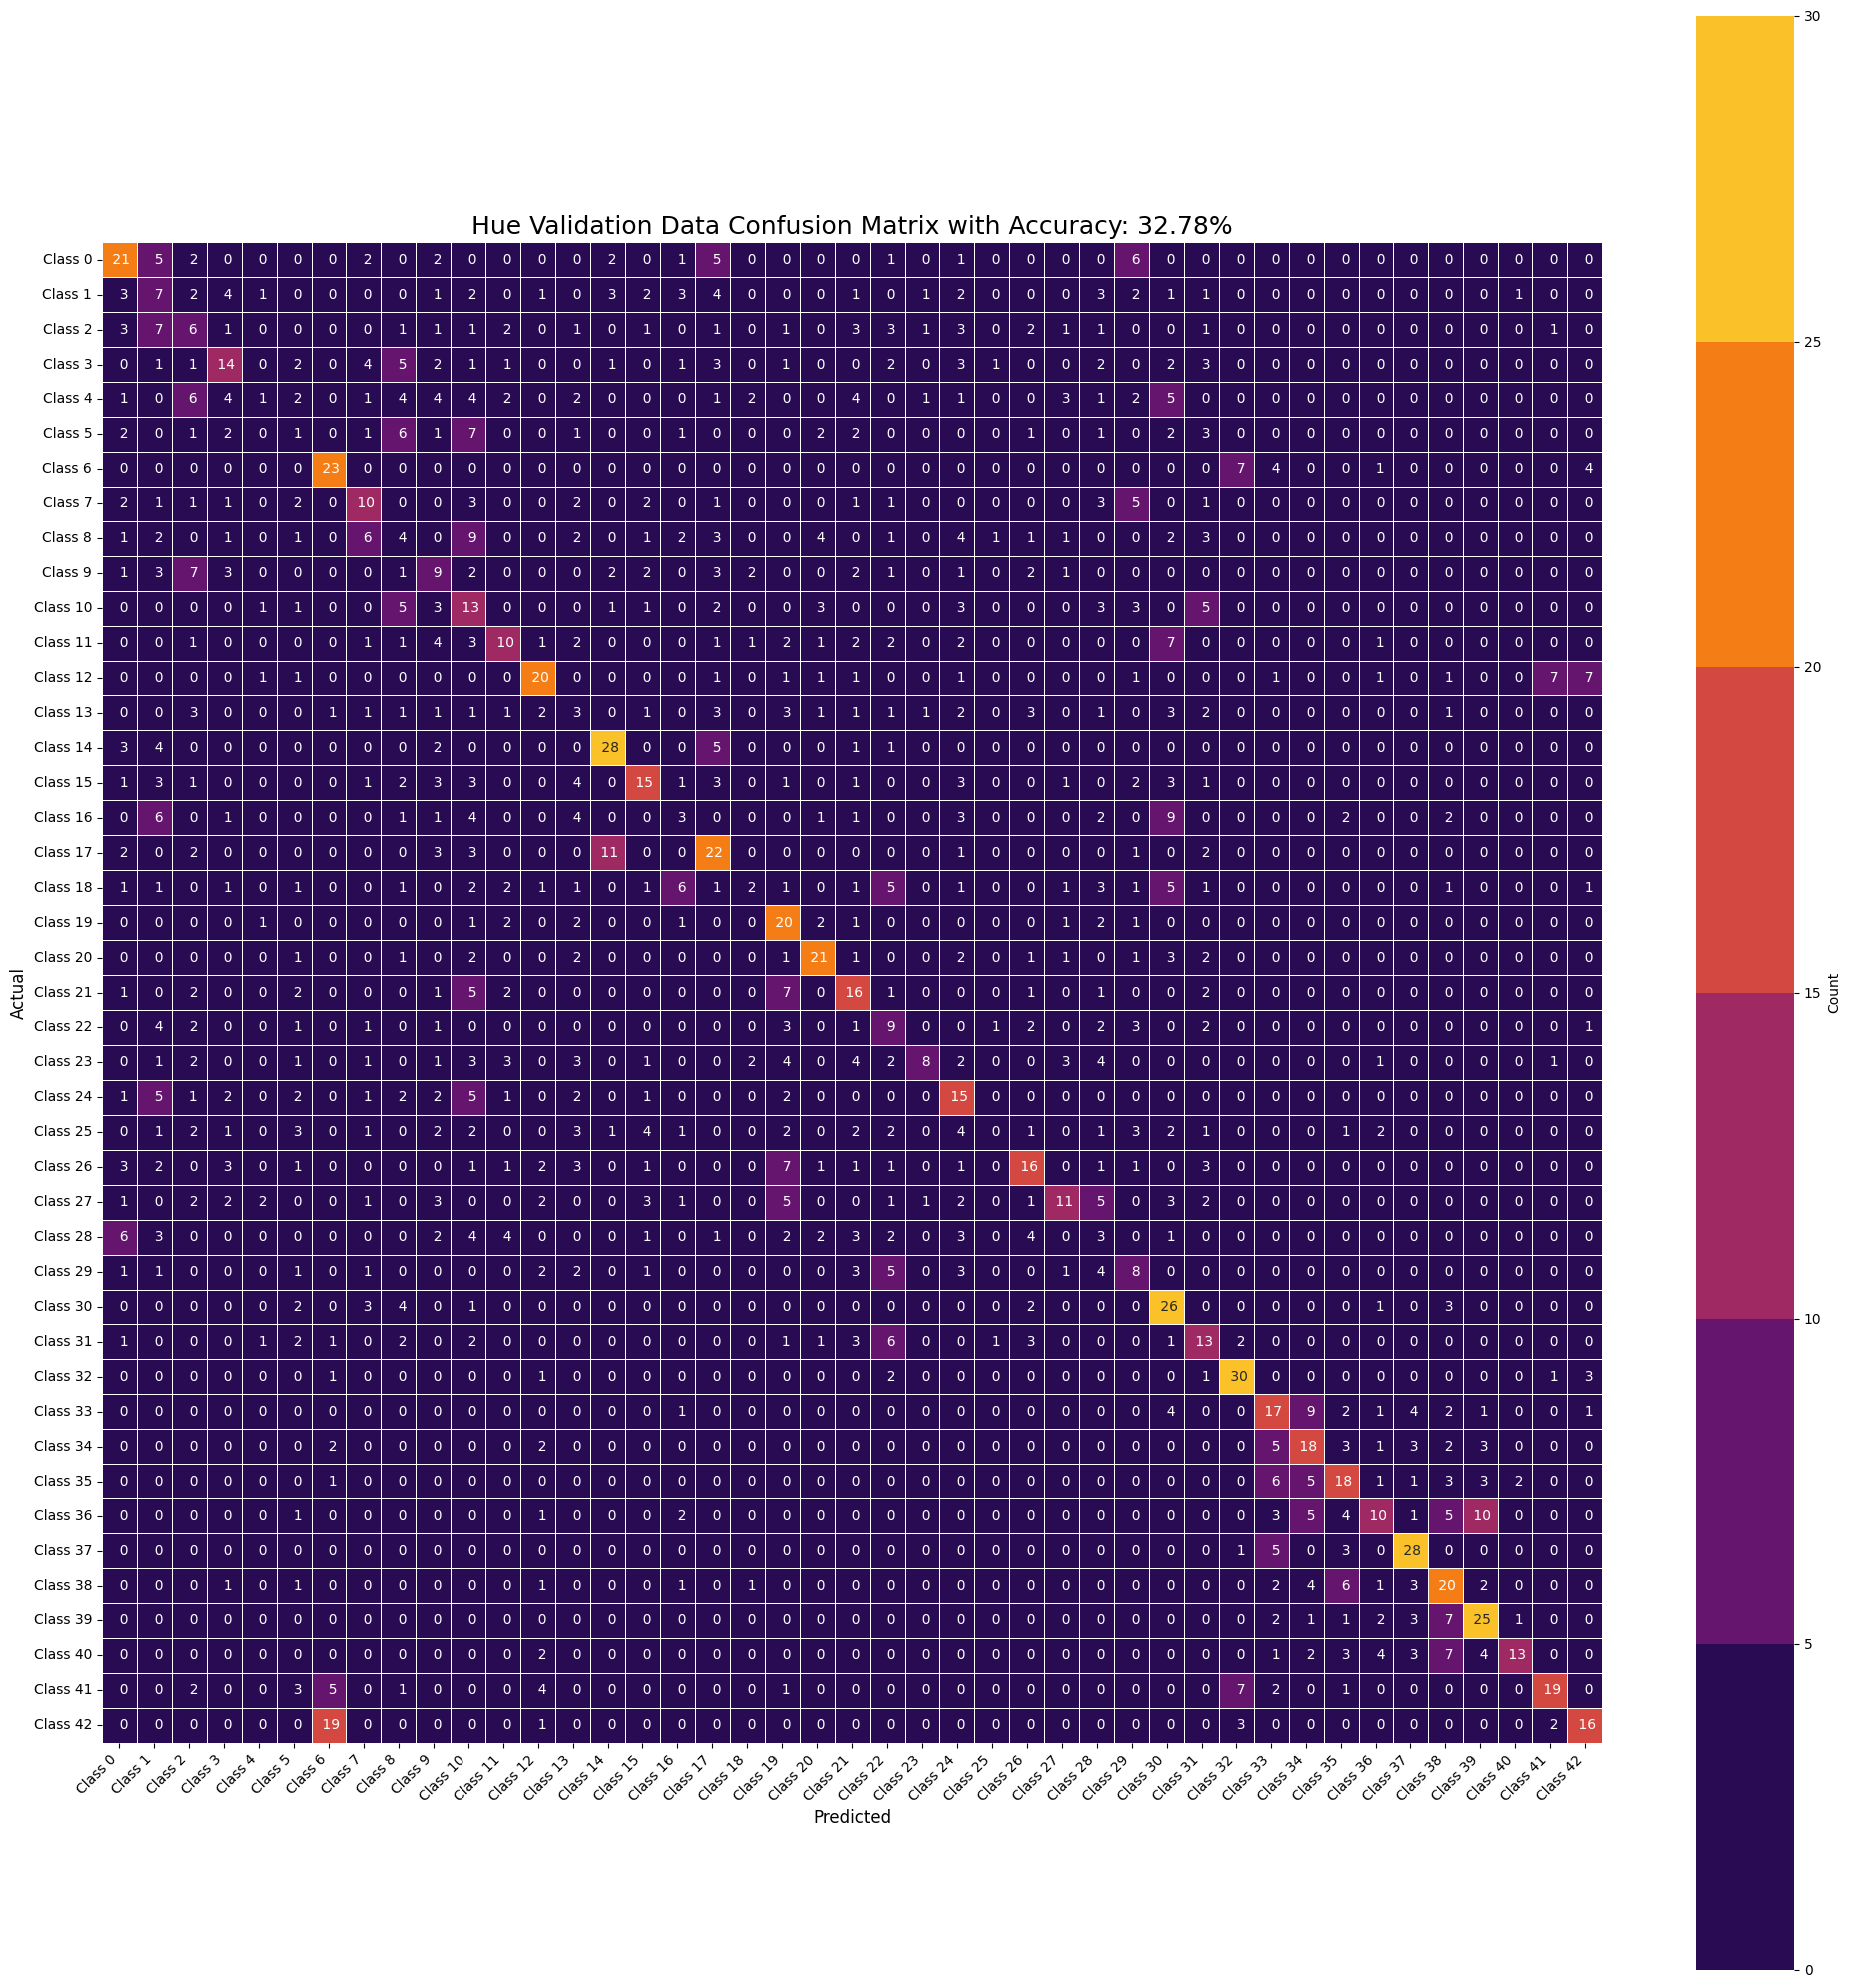

<Figure size 1200x1000 with 0 Axes>

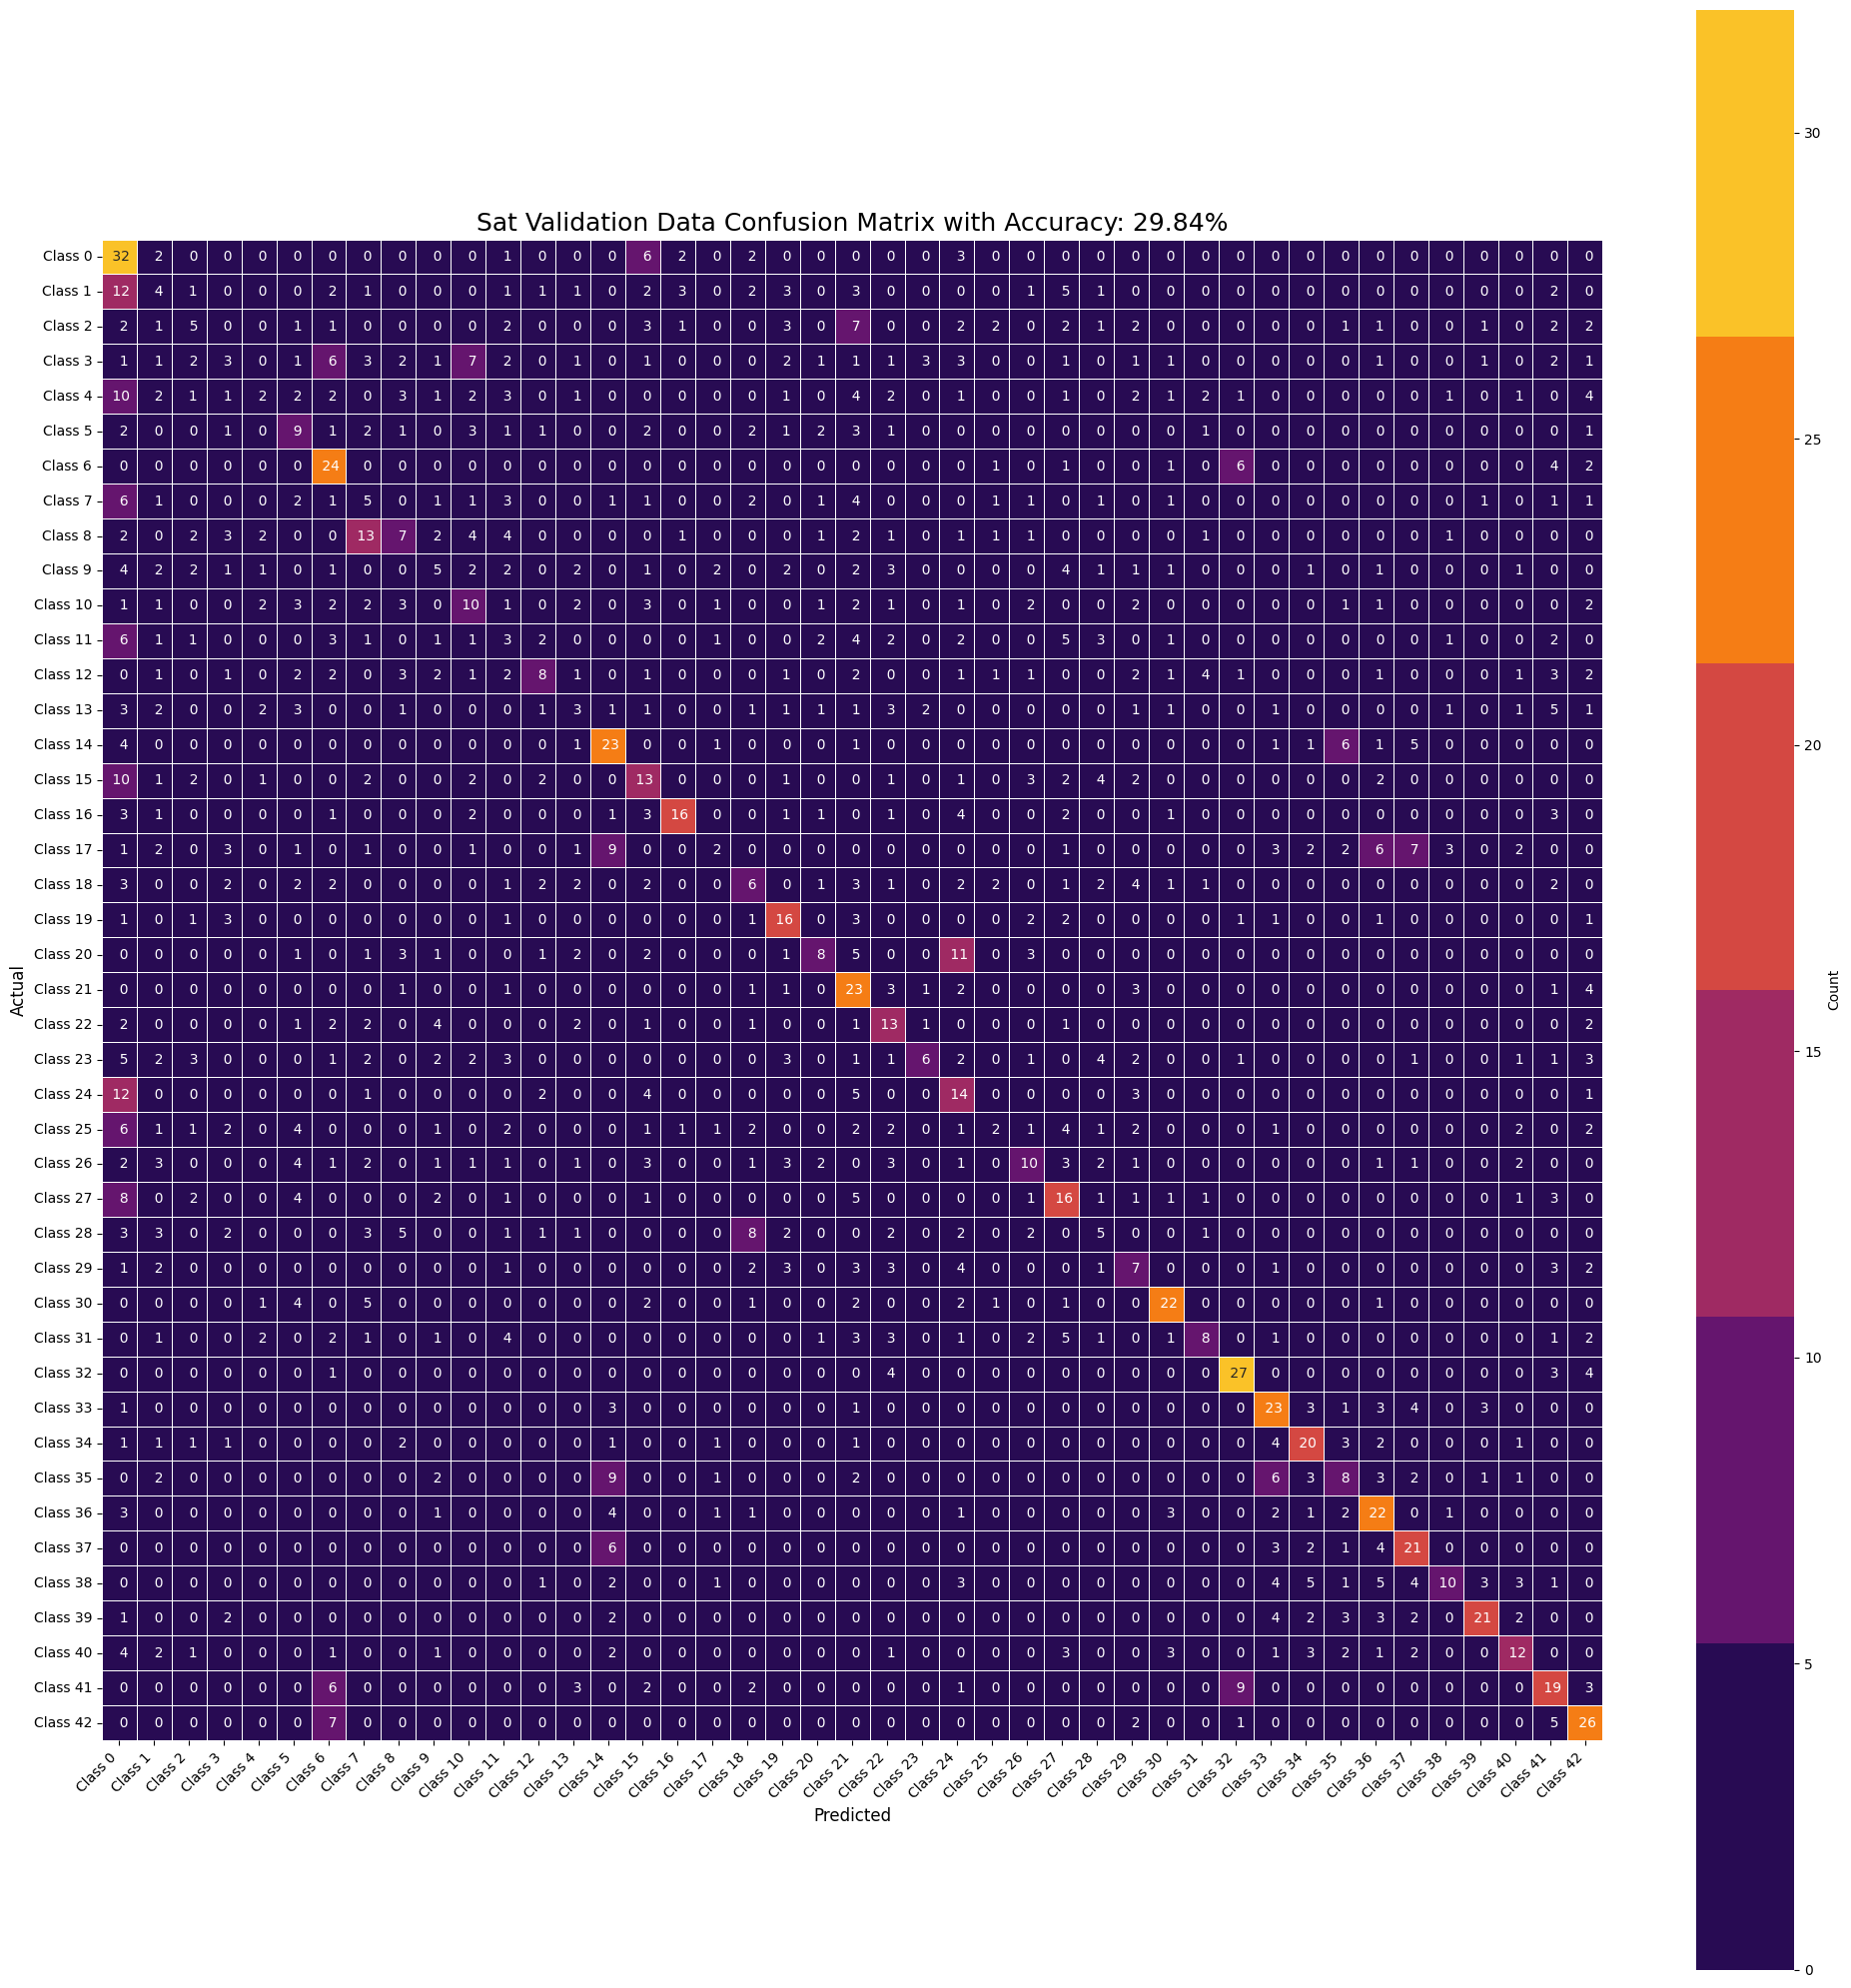

<Figure size 1200x1000 with 0 Axes>

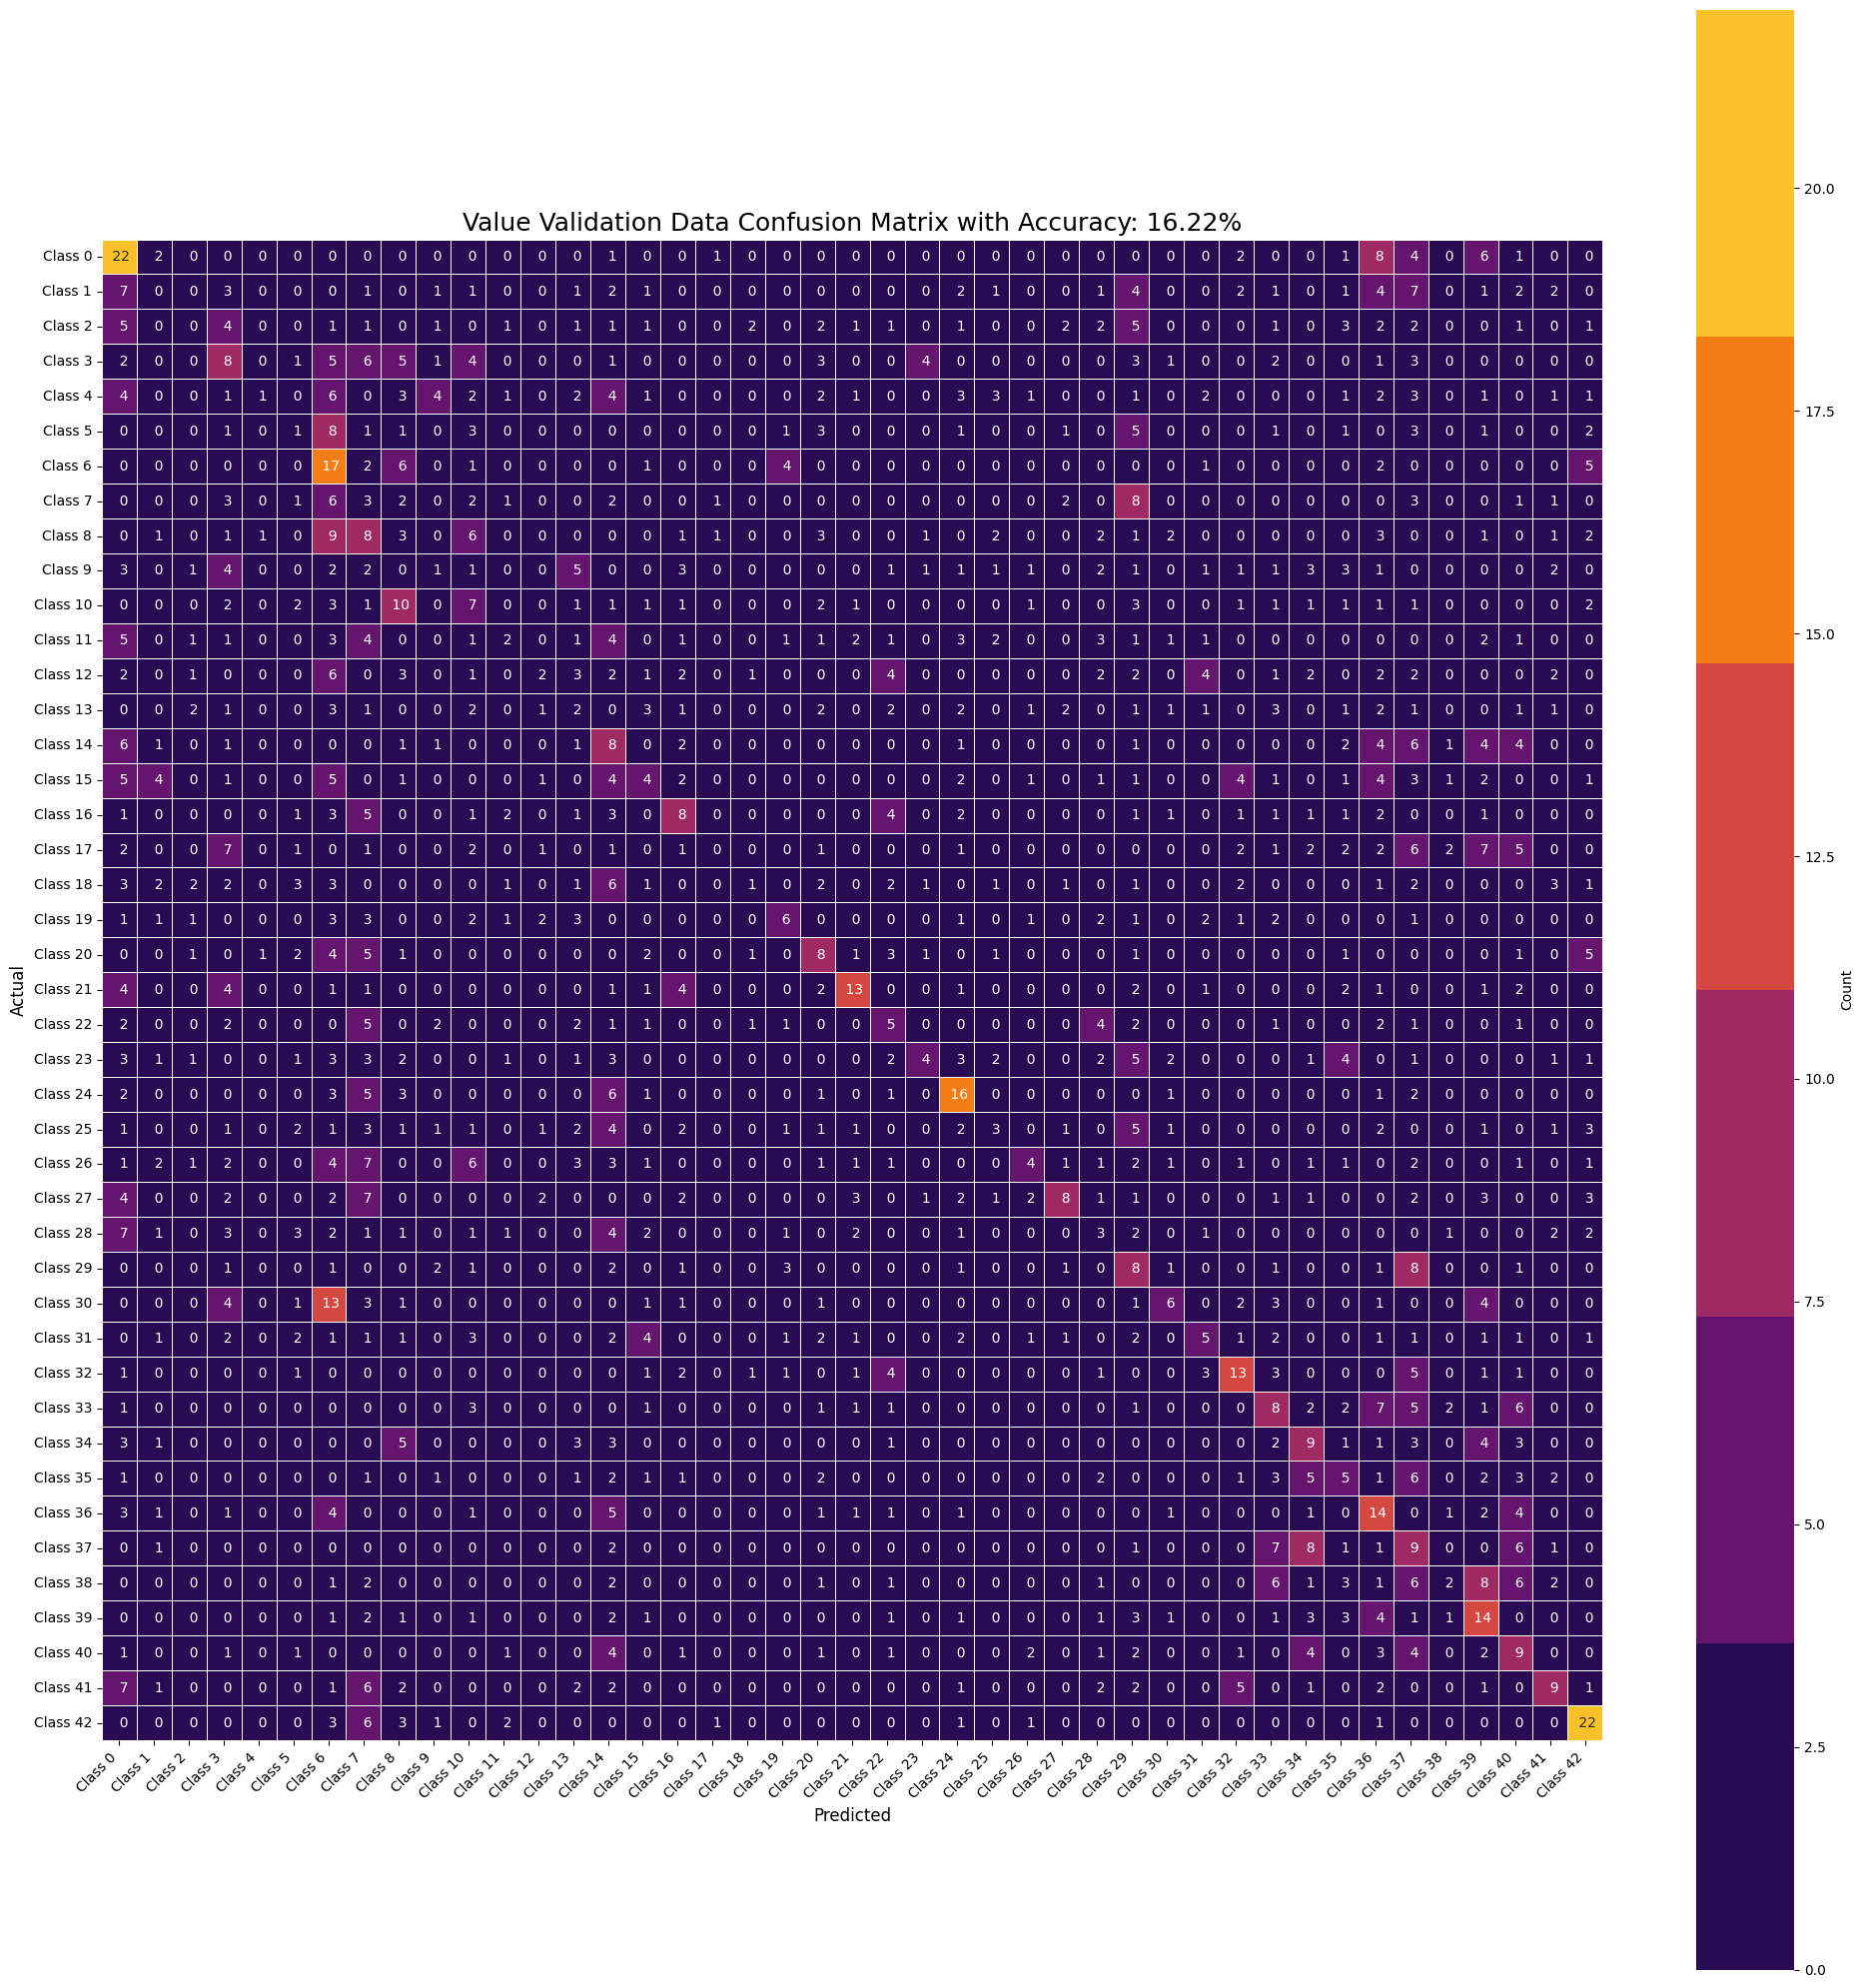

<Figure size 1200x1000 with 0 Axes>

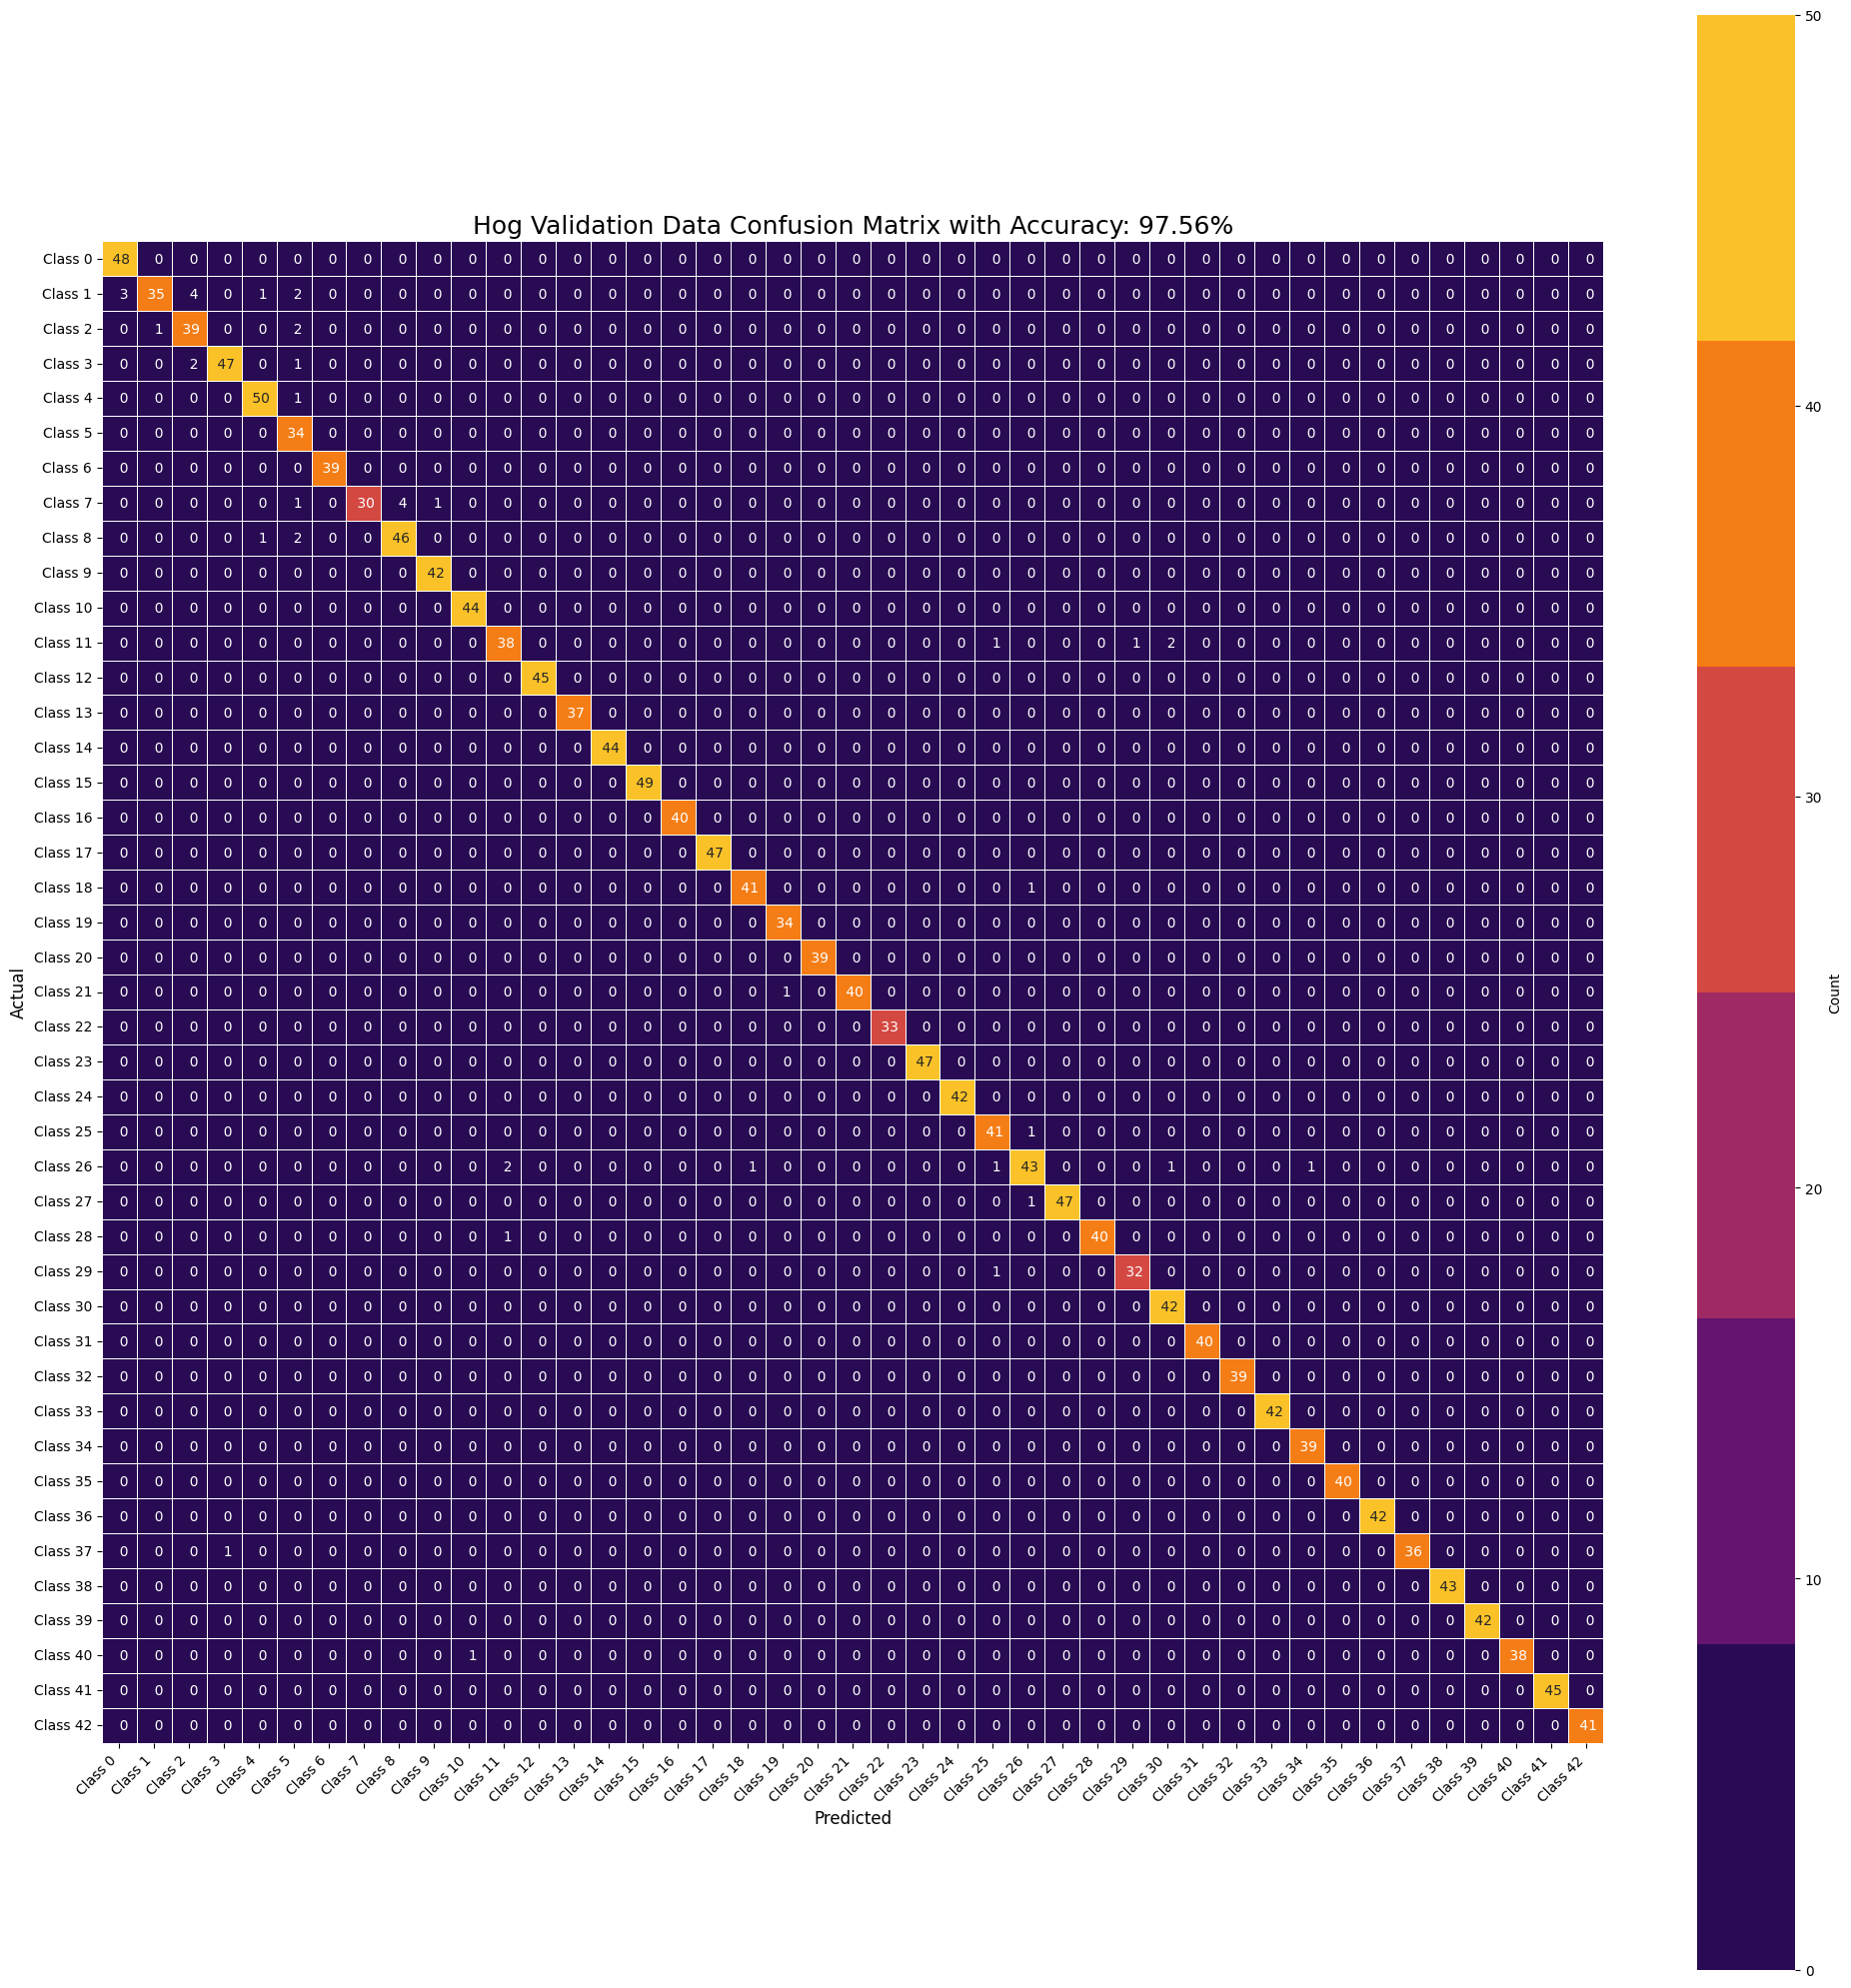

<Figure size 1200x1000 with 0 Axes>

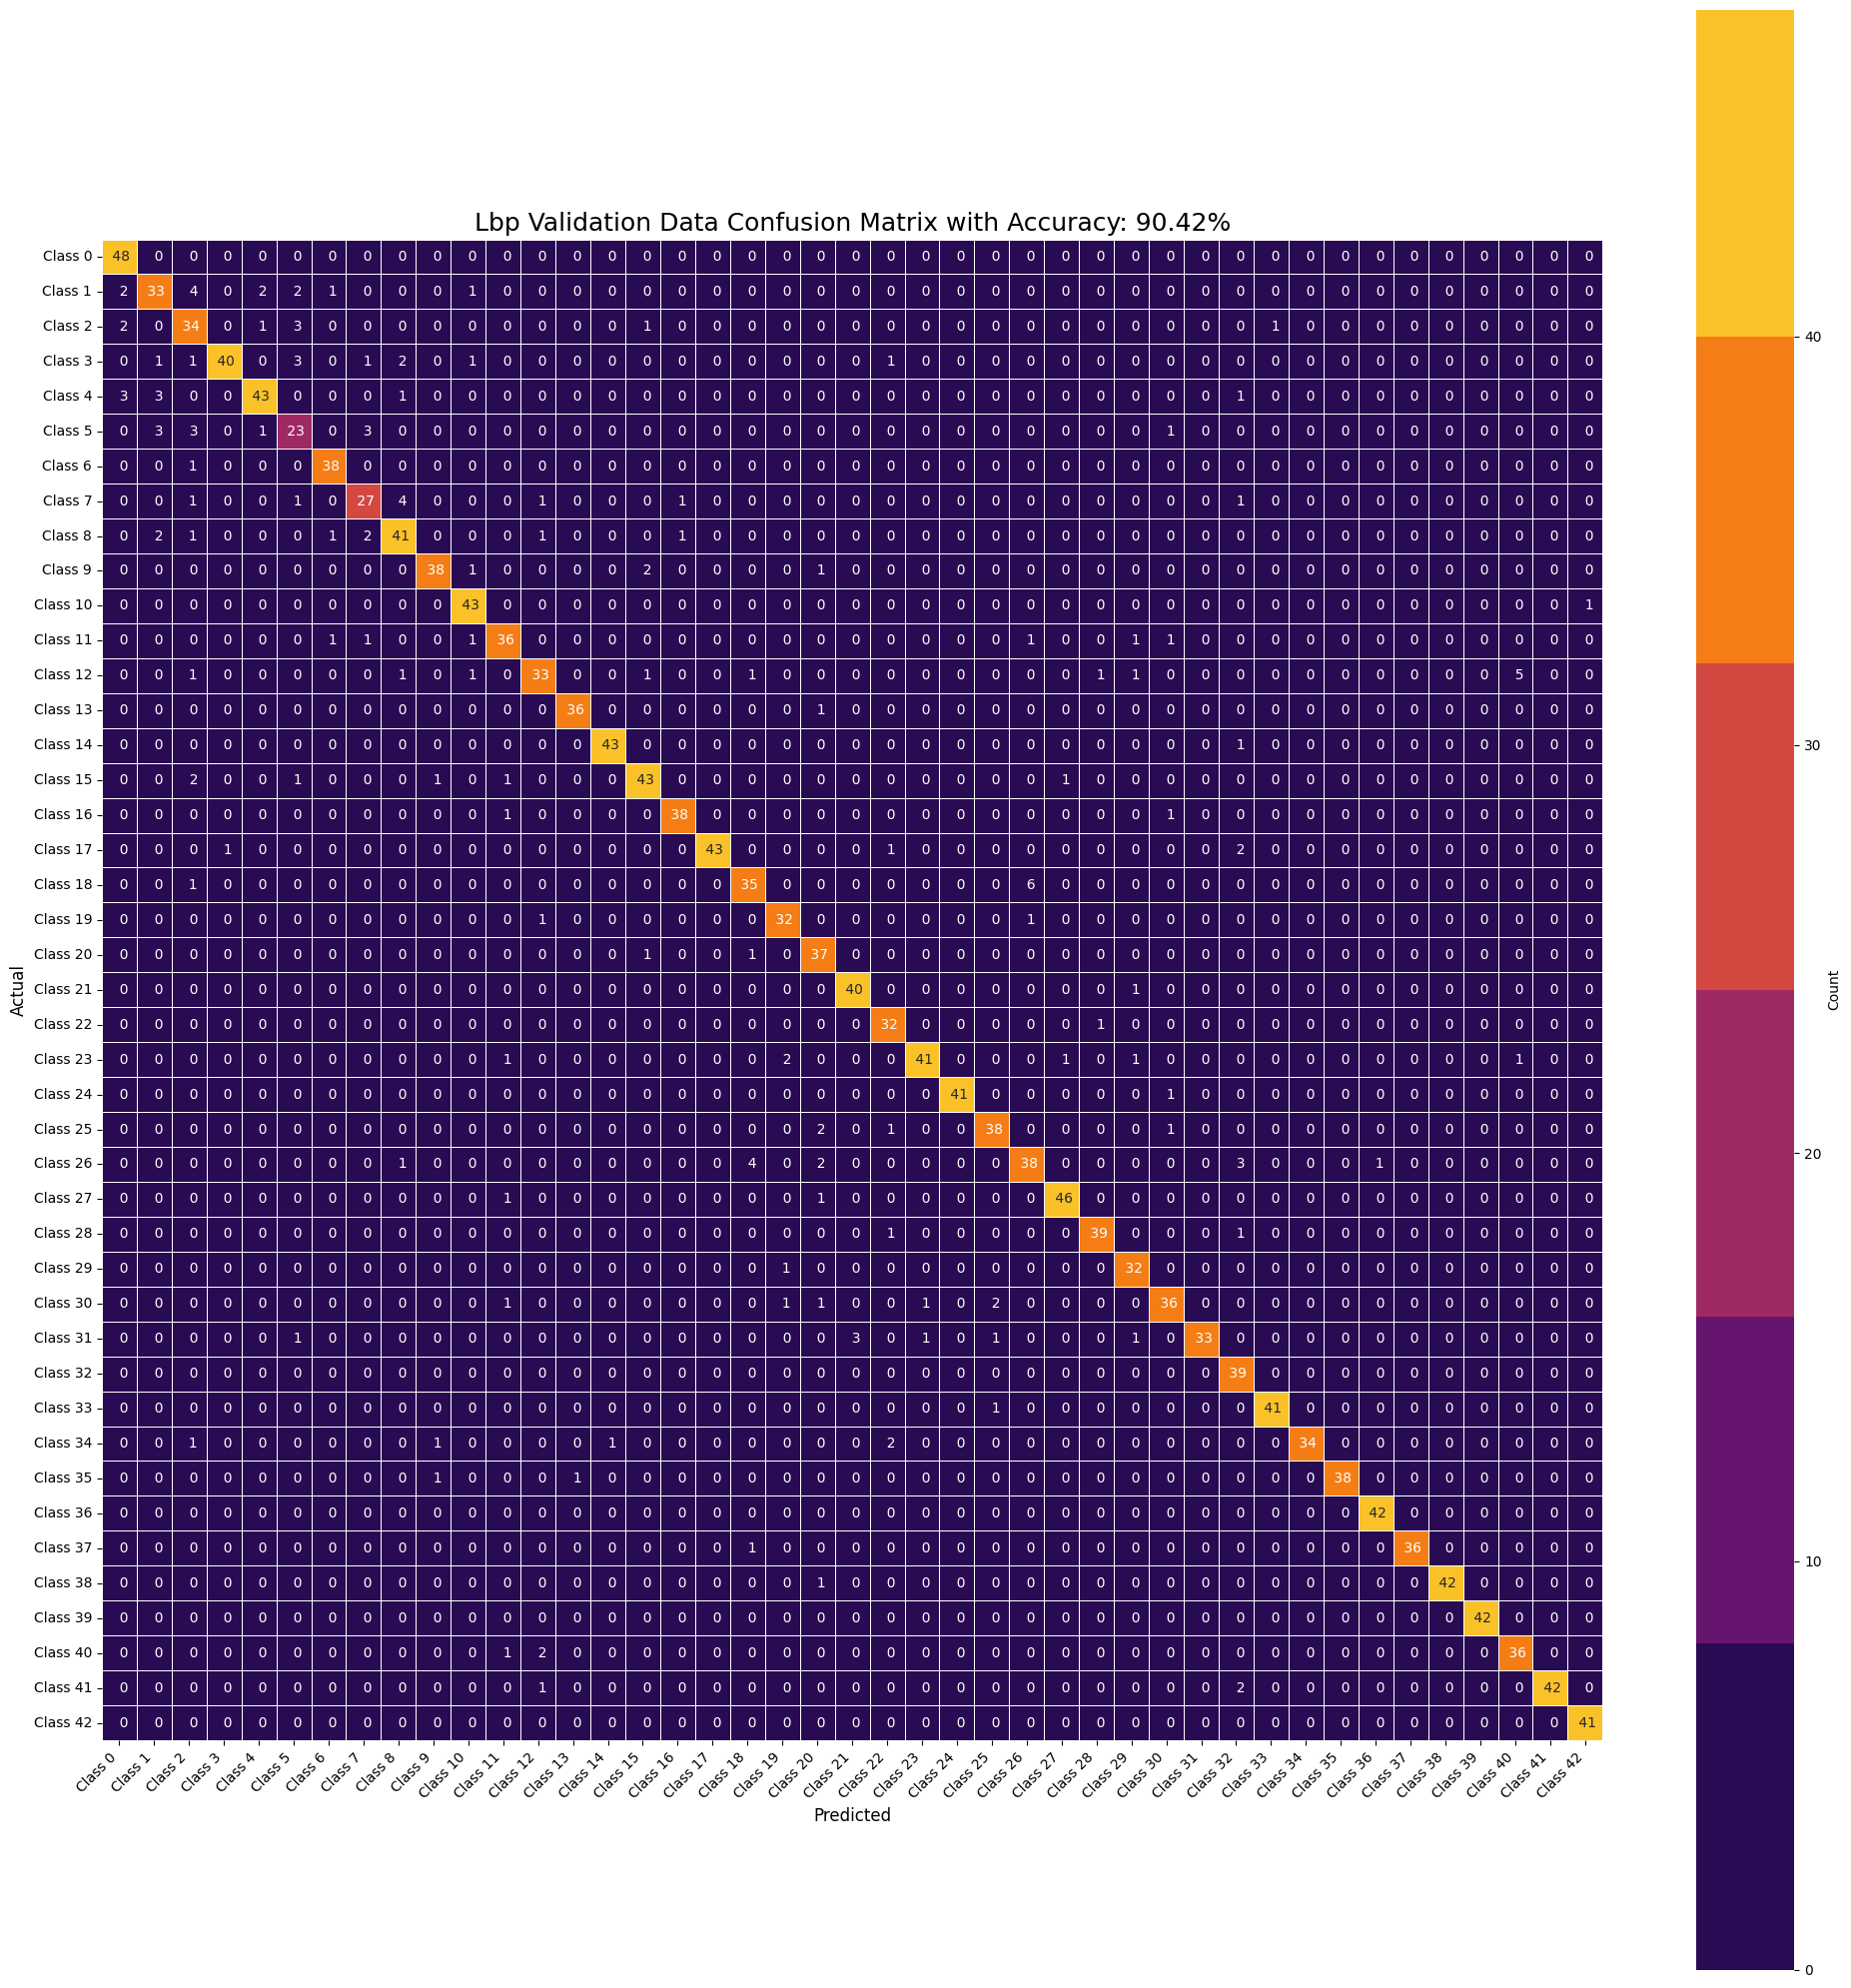

<Figure size 1200x1000 with 0 Axes>

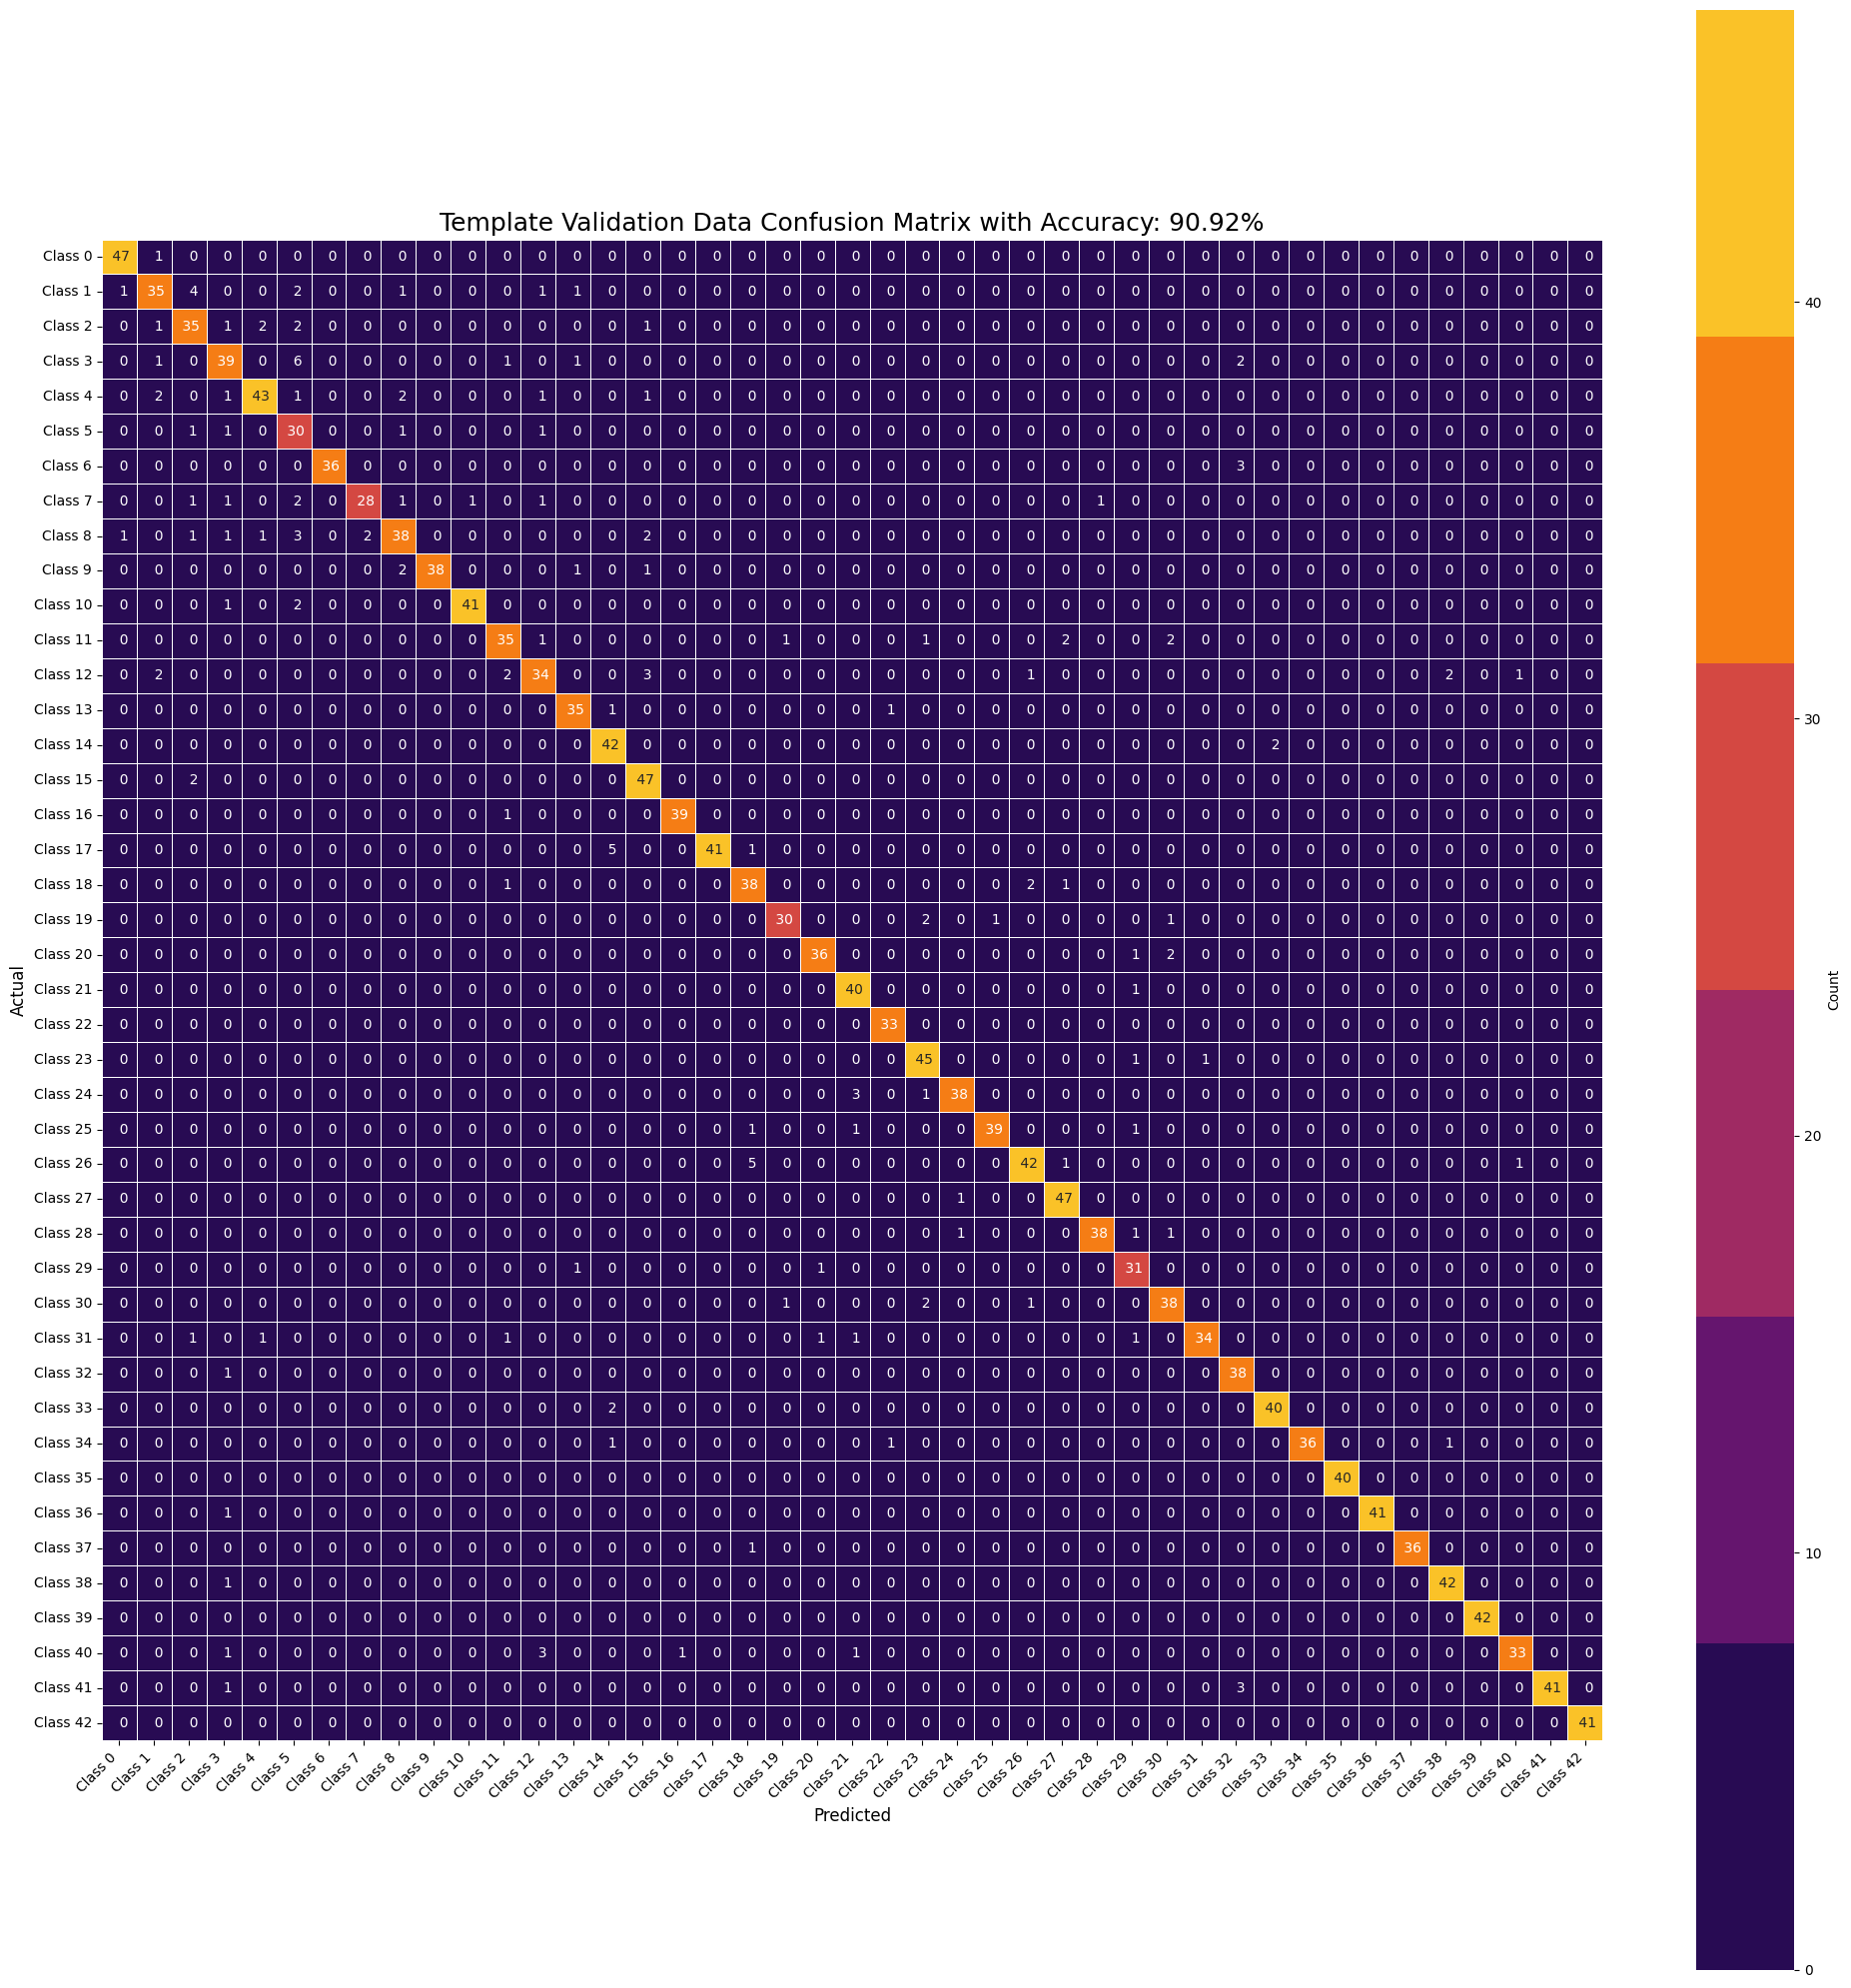

<Figure size 1200x1000 with 0 Axes>

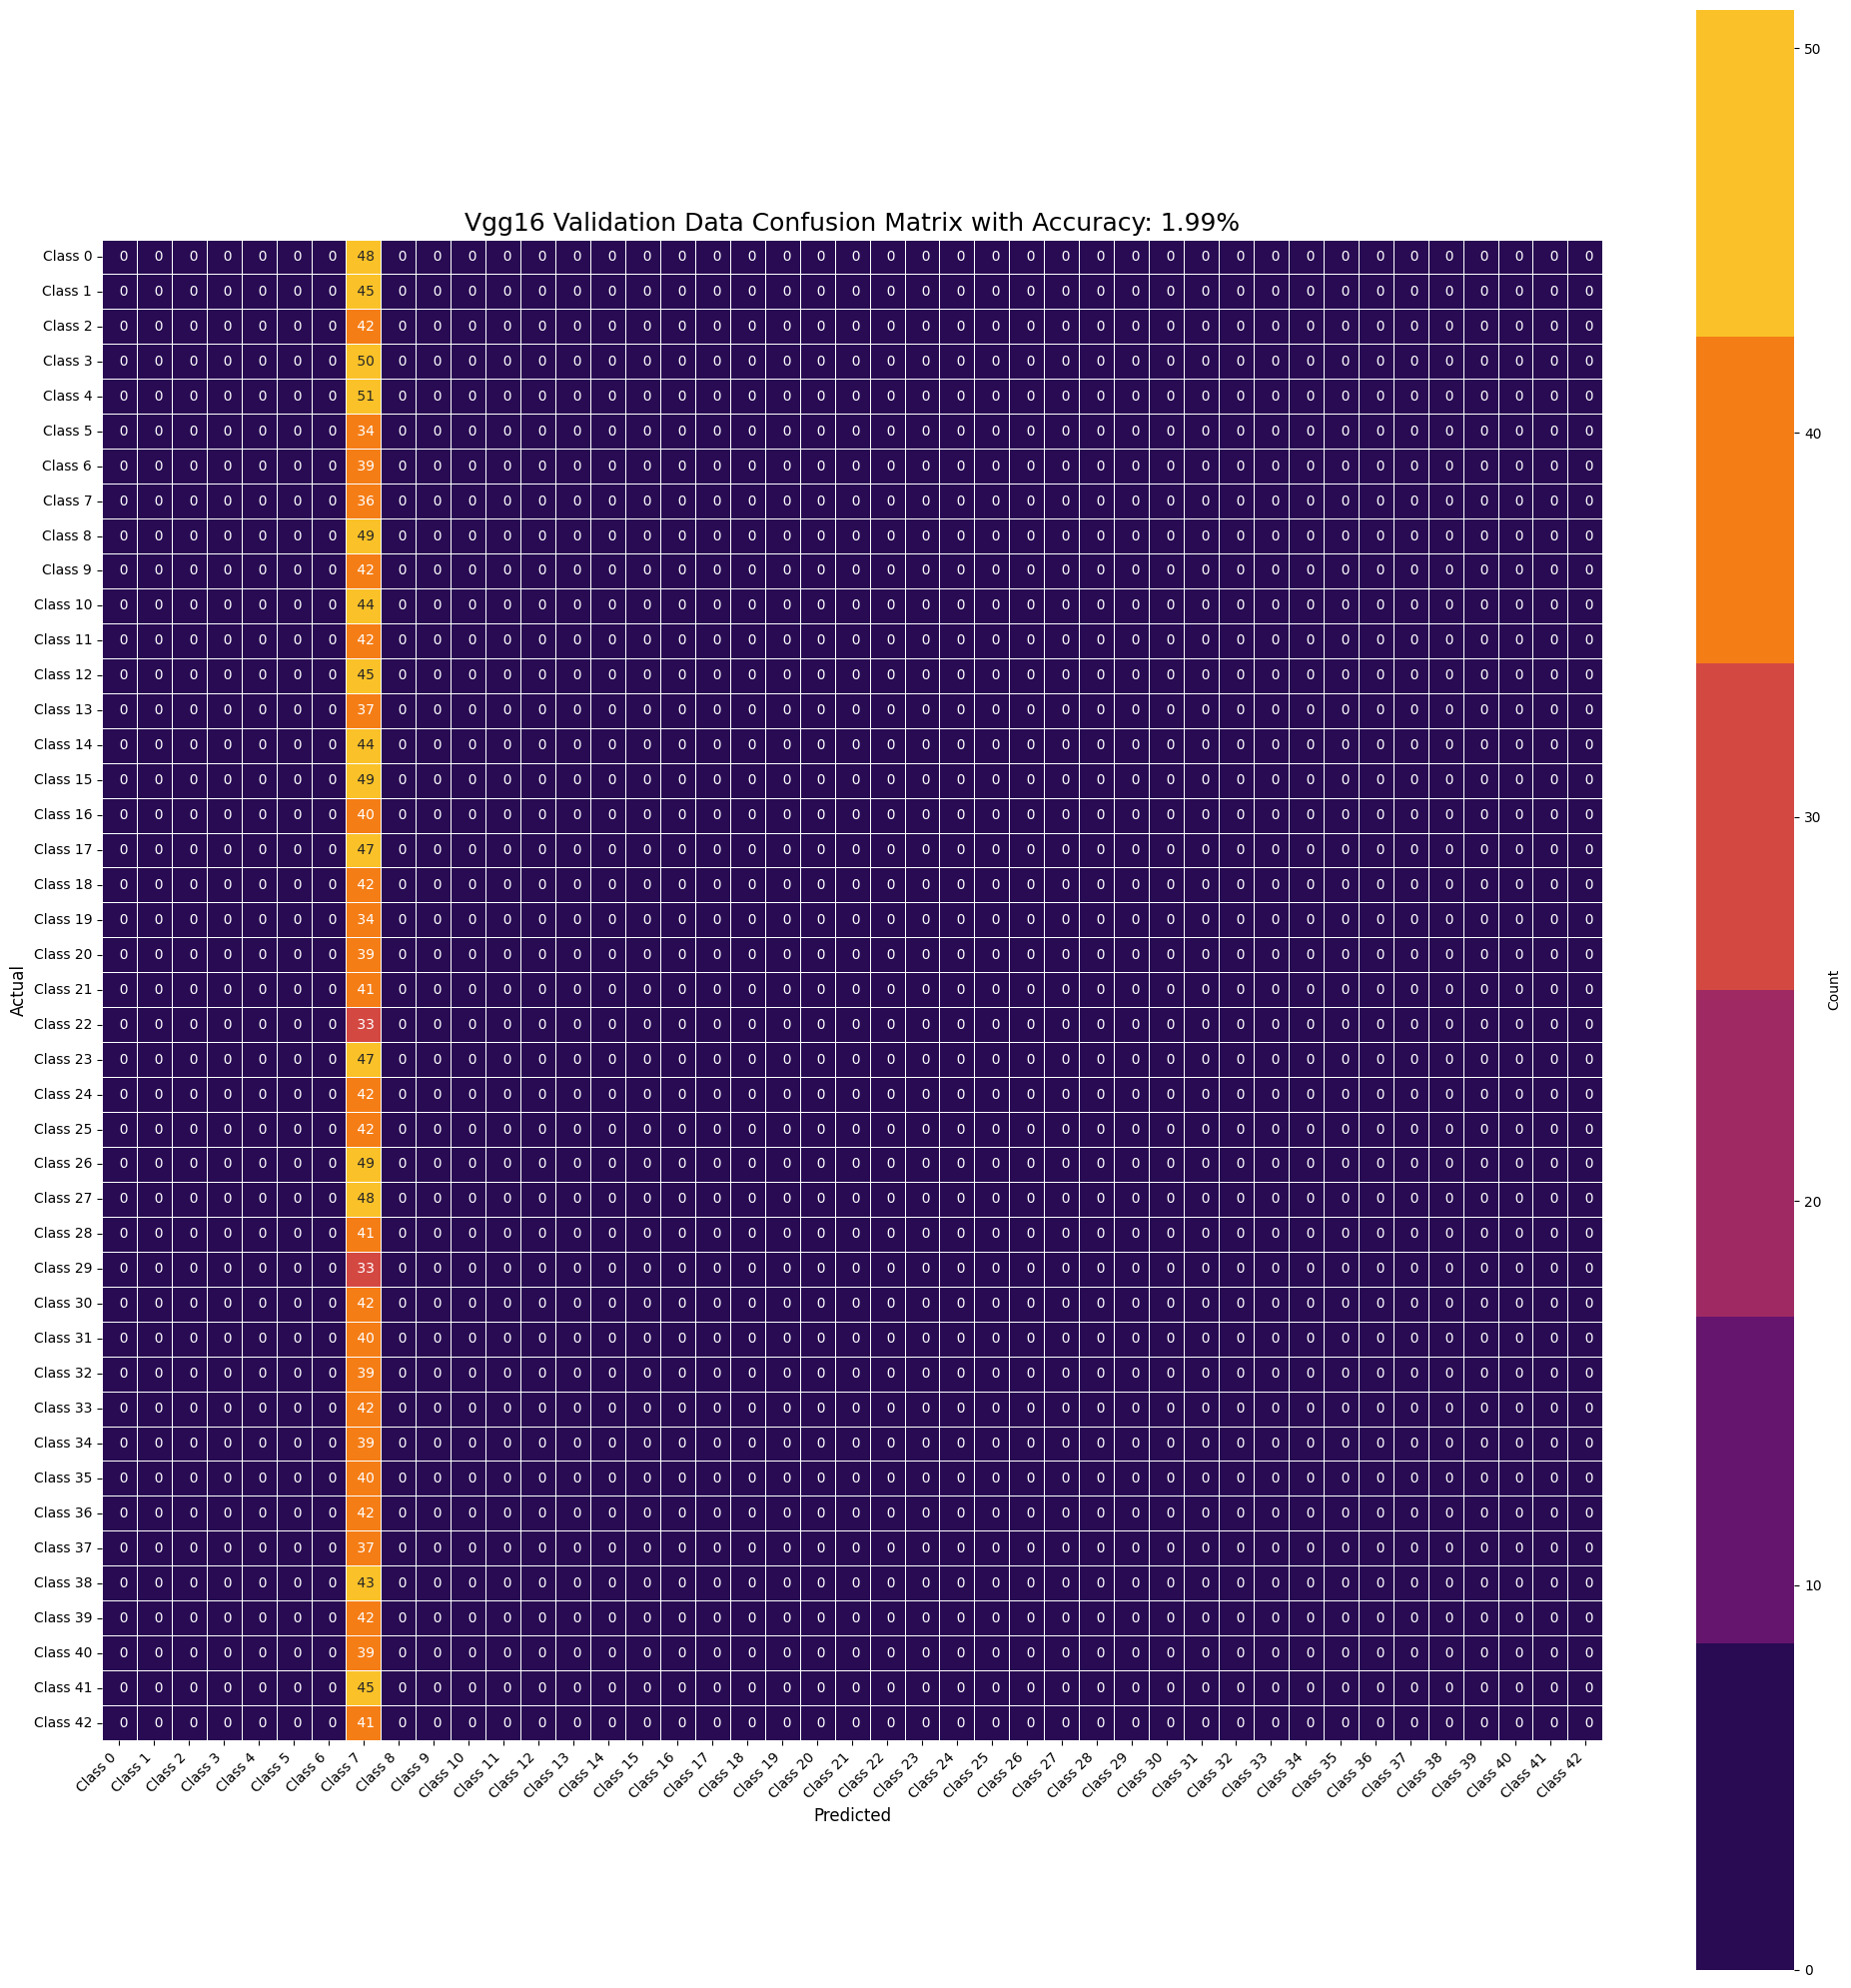

<Figure size 1200x1000 with 0 Axes>

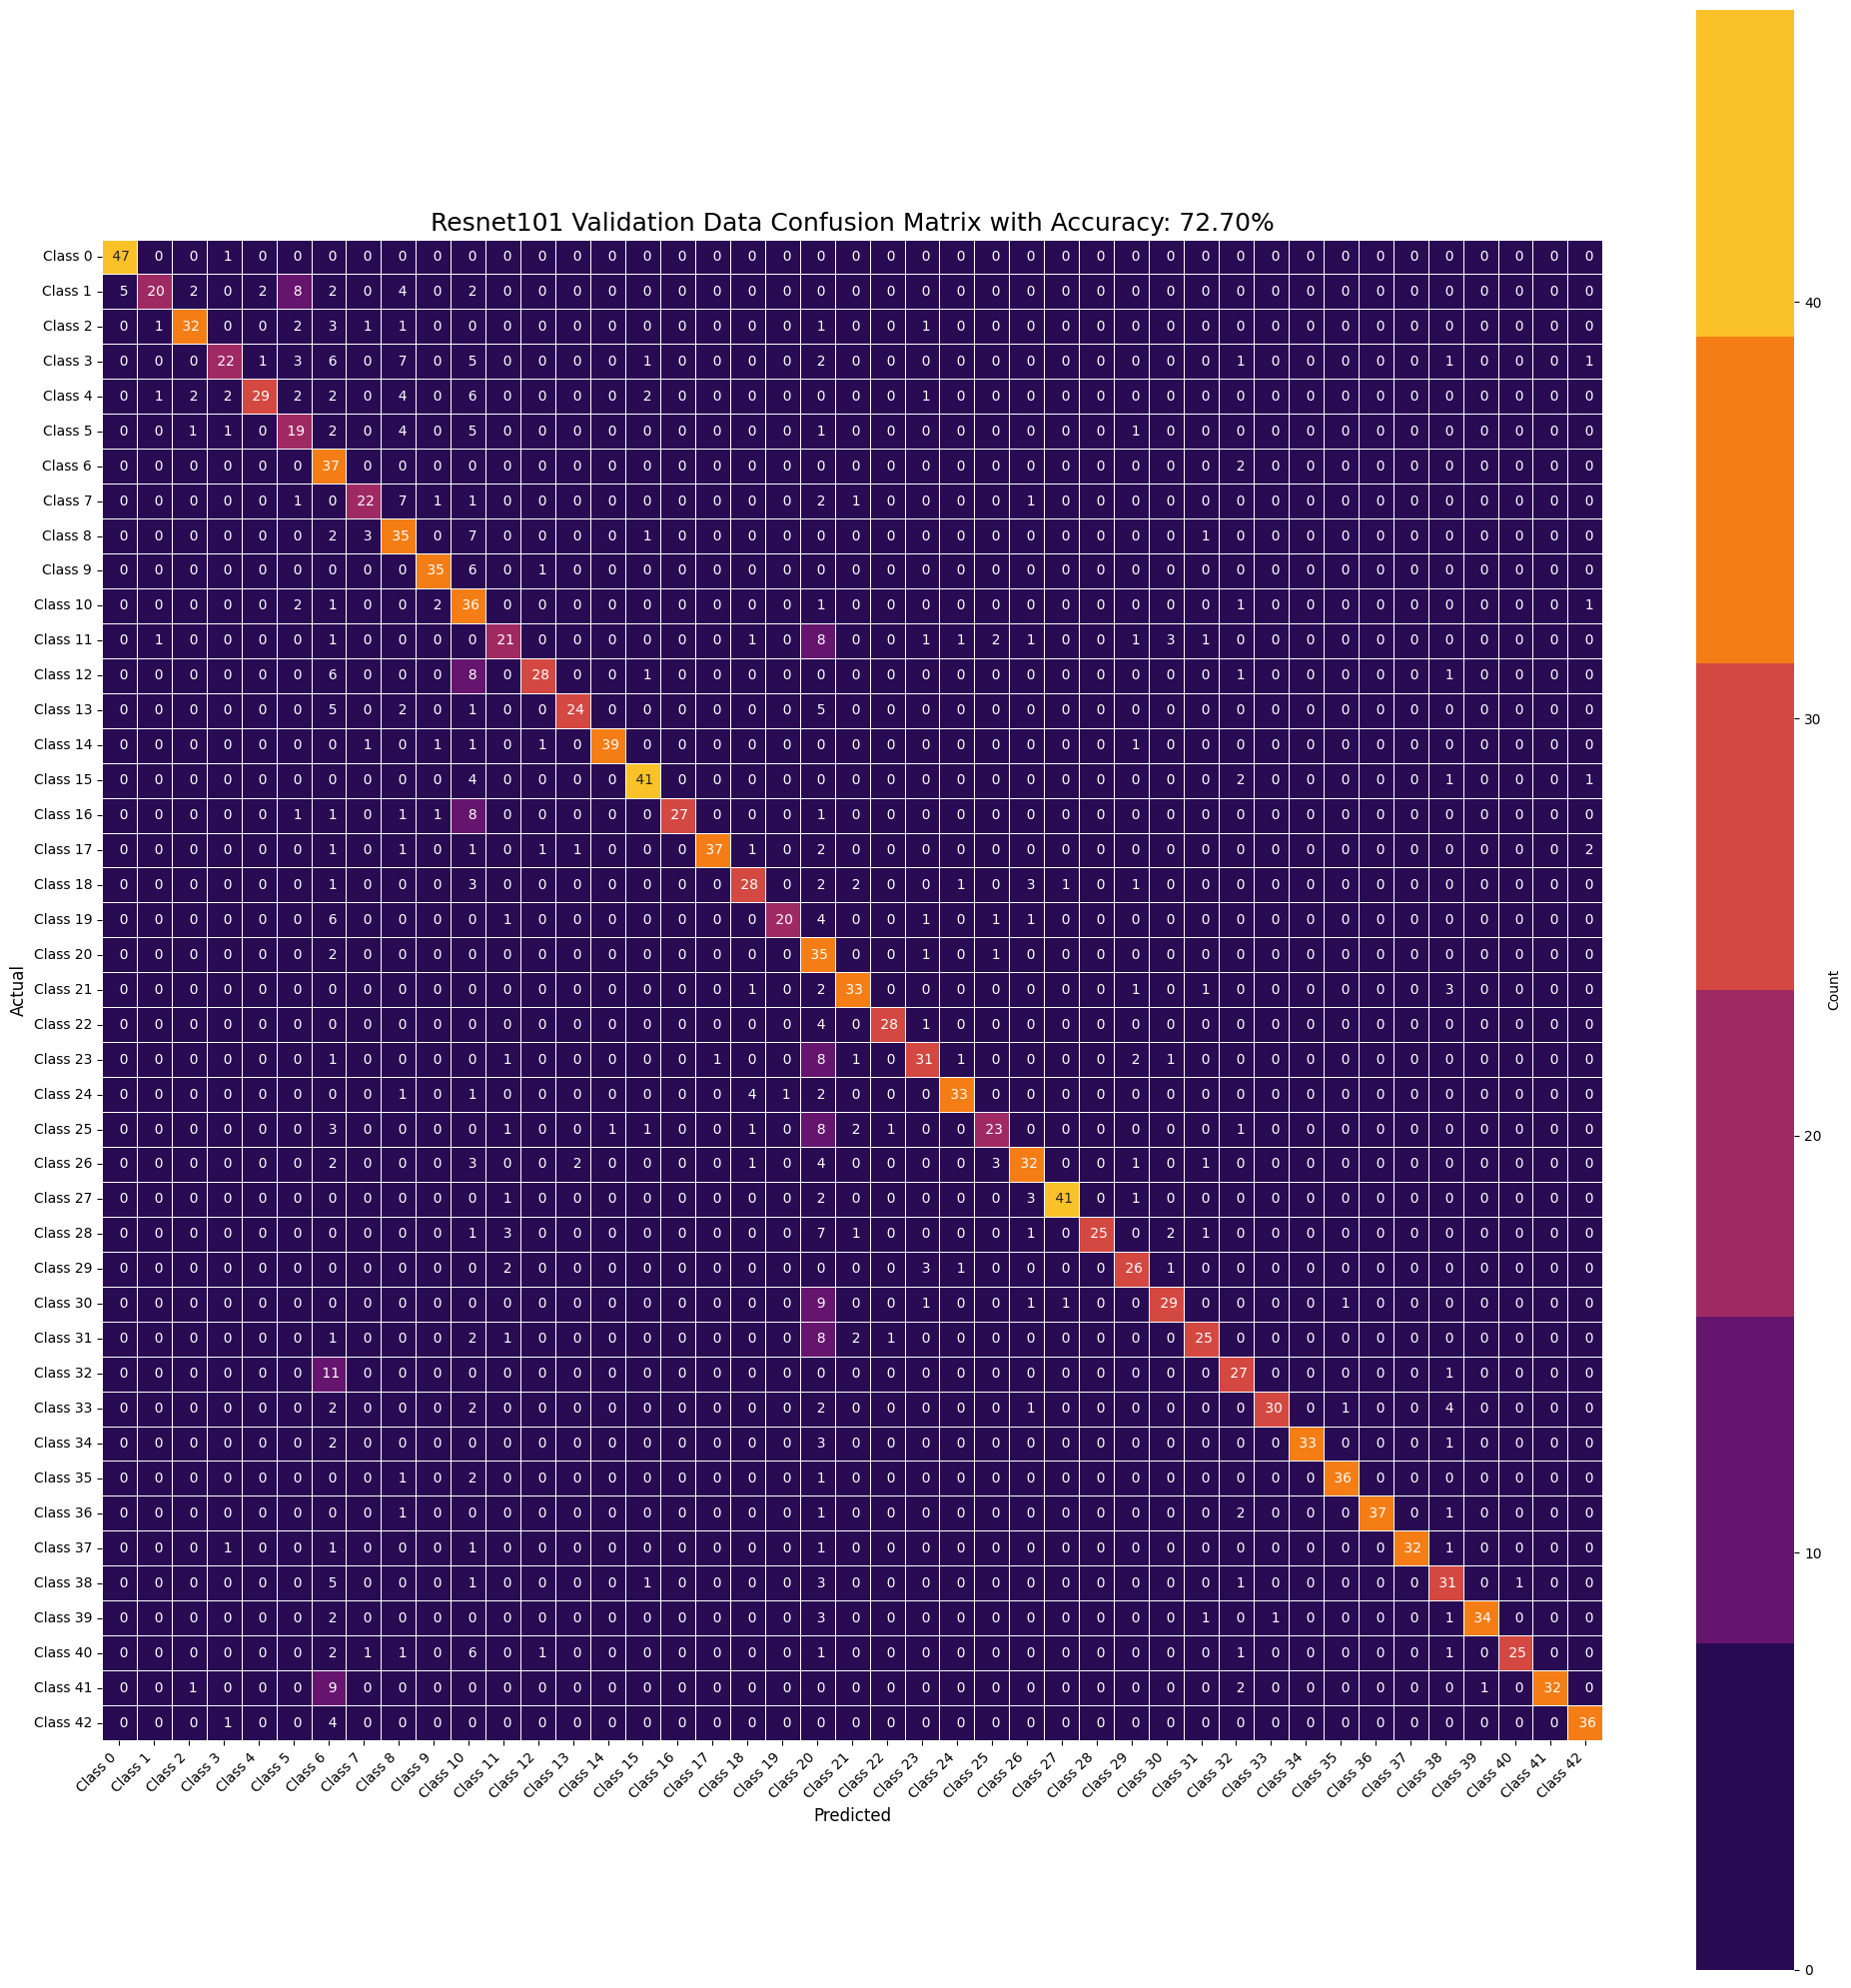

In [35]:
for row in single_features_df.iter_rows(named=True):
    cm = np.asarray(row["ConfusionMatrix"]).reshape(row["ConfusionMatrix_Shape"])
    plt.figure(figsize=(12, 10))

    class_labels = [f"Class {i}" for i in range(43)]

    # Create a color map to represent the count values
    color_map = ListedColormap(sns.color_palette("inferno"))
    plt.figure(figsize=(20, 20))
    sns.heatmap(
        cm,
        annot=True,
        fmt="3d",
        cmap=color_map,
        linewidths=0.5,
        square=True,
        cbar_kws={"label": "Count"},
        xticklabels=class_labels,
        yticklabels=class_labels,
        annot_kws={"size": 10},
    )
    # Customize labels and title
    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)
    plt.title(
        f"{row['Features'][0].capitalize()} Validation Data Confusion Matrix with Accuracy: {row['Accuracy']*100:.2f}%",
        ha="center",
        fontsize=18,
    )

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(rotation=0, fontsize=10)

    # Adjust layout to prevent cutoff of labels
    plt.tight_layout()

    # Show the plot
    plt.show()